 ## **NLP Assignment: Sentiment Analysis**

### **Name: Ravikanth Peddibhotla**

### **Email: kanthravi55@gmail.com**

### **Dataset: IMDB dataset**

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
movies_df = pd.read_csv("/content/drive/MyDrive/IMDB_Dataset.csv", sep=',', engine='python', encoding='utf-8', error_bad_lines=False)

Skipping line 23712: unexpected end of data


### **Exploratory Data Analysis**

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23710 entries, 0 to 23709
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     23710 non-null  object
 1   sentiment  23710 non-null  object
dtypes: object(2)
memory usage: 370.6+ KB


In [ ]:
movies_df.describe()

,review,sentiment
count,23710,23710
unique,23613,2
top,Loved today's show!!! It was a variety and not...,negative
freq,4,11899


In [ ]:
movies_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movies_df.isnull().sum()

review       0
sentiment    0
dtype: int64

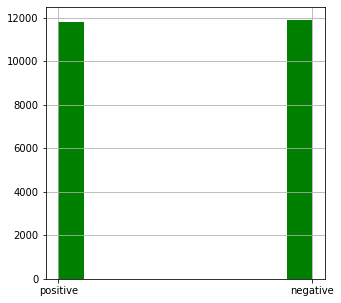

In [ ]:
movies_df['label'] = movies_df['sentiment'].hist(figsize=(5,5),color='g')

### **Bag of Words model**
#### Step1: converting text to lower case, removing all non-word characters, removing all punctuations

In [3]:
import nltk
import re
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
movies_df.columns

Index(['review', 'sentiment', 'label'], dtype='object')

In [23]:
text = movies_df.loc[:,'review']
pd.set_option("display.max_colwidth", None)
text

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. T

In [28]:
from sklearn.model_selection import train_test_split
X = text
y = movies_df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2)

In [41]:
X[:]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. T

In [30]:
print("Train-set size: ", len(X_train))
print("Test-set size:  ", len(X_test))
print("Train-set output size", len(X_train))
print("Test-set output size", len(y_test))

Train-set size:  18968
Test-set size:   4742
Train-set output size 18968
Test-set output size 4742


In [31]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
23705    positive
23706    negative
23707    positive
23708    negative
23709    negative
Name: sentiment, Length: 23710, dtype: object

In [32]:
np.array(X_train)

array(["i still can't belive that starevich made this film back in 1934. animation is simply perfect, and what is amazing about it, with all the advanced technology we have nowadays there are few animation studios that are capable of producing a little gem like this one. it has everything: a great story, beautiful chracters (although this is a morbid kind of beauty in some cases), special effects... well, it is definitely not a kid's movie,but it's a must-see for anyone seriously interested in animation.",
       'Wow, what can I say about this film? It\'s a lousy piece of crap. I\'m surprised that it got rated as high as it did. What\'s wrong with this film? Here\'s a better question: What\'s NOT wrong with this film.<br /><br />The story itself is just crap and cliché. Here\'s pretty much what it\'s about...Some kinda nerdy kid with no friends gets picked on, gets killed, and comes back as a scarecrow for revenge. "All" of that is packed into 86 minutes of worthless film. If you have

## **Building the Bag of Words model**
In this step we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. If a word in a sentence is a frequent word, we set it as 1, else we set it as 0

In [ ]:
import re

sentence = nltk.sent_tokenize(str(text))
for i in range(len(sentence)):
    sentence[i] = sentence[i].lower()
    sentence[i] = re.sub(r'\W', ' ', sentence[i])
    sentence[i] = re.sub(r'\s+', ' ', sentence[i])
sentence    

In [34]:
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

dataset = nltk.word_tokenize(str(sentence))
for i in range(len(dataset)):
  dataset[i] = re.sub('[^a-zA-Z]',' ',dataset[i])
  dataset[i] = dataset[i].lower()
  review = dataset[i].split()
  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ''.join(review)
  corpus.append(review)
  #  dataset[i] = re.sub(r'\W', ' ', dataset[i])
  #  dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
corpus

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=corpus)
tokenizer.fit_on_texts(corpus)

tokenizer.word_index

## **Using Spacy for preprocessing**

In [ ]:
!python -m spacy download en

In [38]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy

In [39]:
text = X[:]
 # Process the text
doc = nlp(str(text))
 # Print the document text
type(doc)

spacy.tokens.doc.Doc

In [ ]:
for token in doc:
  print(token.text)

In [ ]:
for token in doc:
  print(token.text,'--',token.is_stop,'---',token.is_punct)

In [ ]:
import string
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(sentence)

In [45]:
sparse_matrix

<72x881 sparse matrix of type '<class 'numpy.int64'>'
	with 1823 stored elements in Compressed Sparse Row format>

In [46]:
sentences = cv.fit_transform(sentence).toarray()

In [47]:
sentences.shape

(72, 881)

## **Cosine Similarity of reviews**

In [48]:
X[0:2]

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

In [49]:
a = nlp(str(X[0:1])).vector
b = nlp(str(X[1:2])).vector

In [50]:
# Compute Cosine Similarity
def cosine_similarity(a,b):
  return a.dot(b)/np.sqrt(a.dot(a)*b.dot(b))

In [51]:
cosine_similarity(a,b)

0.9150234

In [52]:
X[23708:23709]

23708    PLEASE TAKE A MINUTE TO READ MY ENTIRE REVIEW. I AM NOT KNOCKING THE FILM ITSELF - ONLY THE DVD VERSIONS CURRENTLY AVAILABLE.<br /><br />***<br /><br />I really wanted to give this film even two stars. I mean how could it possibly rank a mere 1 out of 10!?!<br /><br />Here's how: An epic film adaptation of Tolstoy's novel "War and Peace" with historically accurate battle scenes, courtesy of the Red Army, and an extremely faithful, scene-for-scene adaptation of the novel would be difficult but worth sitting through for seven hours - if that's what you were seeing.<br /><br />The trouble is you can't see that film - anywhere as far as I know.<br /><br />I am attempting to watch the RusCiCo DVD version - widely considered the best version available since it's letter boxed and restores the scenes that were cut from other DVD releases. <br /><br />But, it is one of the worst film prints I've ever seen transfered to DVD. The picture is muddy and inconsistent, often strobing. It's al

In [53]:
c = nlp(str(X[23708:23709])).vector

In [54]:
cosine_similarity(a,c)

0.950082

## **Mathematical models for sentiment analysis**
### SVM Model

In [55]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [56]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)

Word Vectorization

In [57]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(text)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [58]:
print(X_train.shape,y_test.shape)

(18968,) (4742,)


In [59]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  89.37157317587517


### Navie Bayes Model

In [60]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  85.49135385913117


**AUC ROC curve:**  Area Under Curve - Receiver Characteristic Operator

In [66]:
from sklearn.metrics import roc_curve

# roc curve for models
flasepositiverate1, truepositiverate1, thresh1 = roc_curve(Test_Y, predictions_SVM, pos_label=1)
flasepositiverate2, truepositiverate2, thresh2 = roc_curve(Test_Y, predictions_NB, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Test_Y))]
p_fpr, p_tpr, _ = roc_curve(Test_Y, random_probs, pos_label=1)


In [67]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Test_Y, predictions_SVM)
auc_score2 = roc_auc_score(Test_Y, predictions_NB)

print(auc_score1, auc_score2)

0.893764392682184 0.8544479970510124


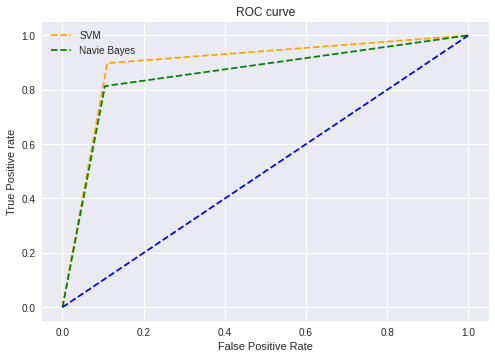

In [69]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(flasepositiverate1, truepositiverate1, linestyle='--',color='orange', label='SVM')
plt.plot(flasepositiverate2, truepositiverate2, linestyle='--',color='green', label='Navie Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

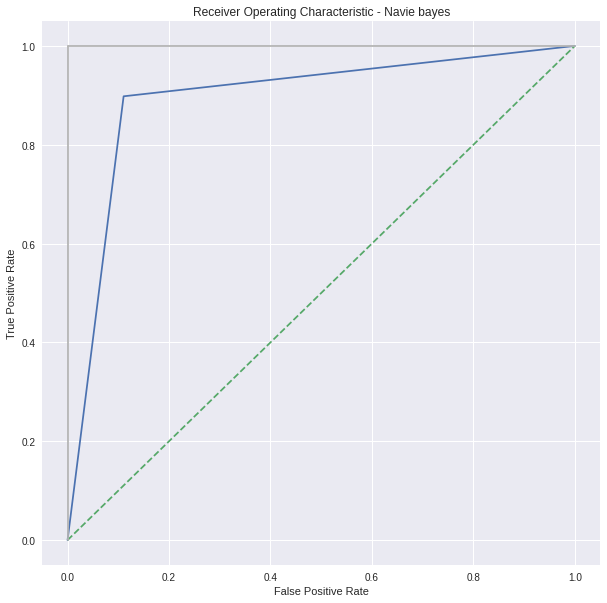

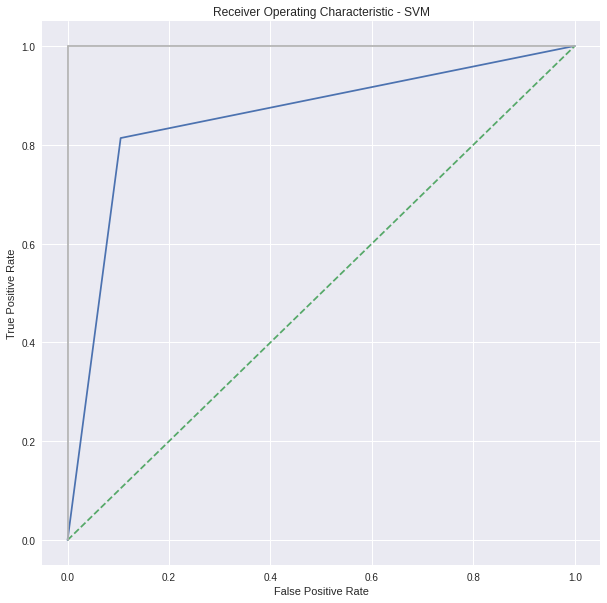

In [72]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Navie bayes')
    plt.plot(flasepositiverate1, truepositiverate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - SVM')
    plt.plot(flasepositiverate2, truepositiverate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()